2586.769647563161


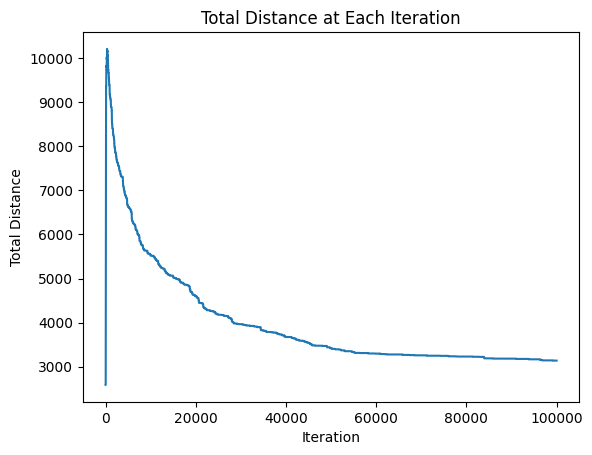

([1,
  2,
  242,
  243,
  244,
  241,
  240,
  239,
  238,
  237,
  236,
  235,
  234,
  233,
  232,
  231,
  246,
  245,
  247,
  250,
  251,
  230,
  229,
  228,
  227,
  226,
  225,
  224,
  223,
  222,
  221,
  220,
  219,
  218,
  217,
  216,
  215,
  214,
  213,
  212,
  211,
  210,
  207,
  206,
  205,
  204,
  203,
  202,
  201,
  198,
  197,
  196,
  195,
  194,
  193,
  192,
  191,
  190,
  189,
  188,
  187,
  186,
  185,
  184,
  183,
  182,
  181,
  176,
  180,
  179,
  150,
  178,
  177,
  151,
  152,
  156,
  153,
  155,
  154,
  129,
  130,
  131,
  20,
  21,
  128,
  127,
  126,
  125,
  124,
  123,
  122,
  121,
  120,
  119,
  157,
  158,
  159,
  160,
  175,
  161,
  162,
  163,
  164,
  165,
  166,
  167,
  168,
  169,
  170,
  172,
  171,
  173,
  174,
  107,
  106,
  105,
  104,
  103,
  102,
  101,
  100,
  99,
  98,
  97,
  96,
  95,
  94,
  93,
  92,
  91,
  90,
  89,
  109,
  108,
  110,
  111,
  112,
  88,
  87,
  113,
  114,
  115,
  117,
  116,
  86,
  85,

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import random
import math
import re

def read_tsp_file(filename):
    with open(filename, 'r') as file:
        lines = file.read().splitlines()
    coordinates = {}
    for line in lines:
        if line.startswith('NODE_COORD_SECTION'):
            break
    for line in lines[lines.index('NODE_COORD_SECTION') + 1:]:
        if line.strip() == 'EOF':
            break
        parts = line.split()
        coordinates[int(parts[0])] = (float(parts[1]), float(parts[2]))
    return coordinates

def read_tour_file(filename):
    with open(filename, 'r') as file:
        lines = file.read().splitlines()
    tour = []
    for line in lines:
        if line.startswith('TOUR_SECTION'):
            break
    for line in lines[lines.index('TOUR_SECTION') + 1:]:
        if line.strip() == '-1' or re.match(r'EOF', line.strip()):
            break
        tour.append(int(line.strip()))
    return tour
'''
# Example usage
tsp_coordinates = read_tsp_file('a280.tsp.txt')
initial_tour = read_tour_file('a280.opt.tour.txt')

print(tsp_coordinates)
print(initial_tour)
'''
def euclidean_distance(coord1, coord2):
    return math.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2)

# Function to calculate the total distance of the tour
def calculate_total_distance(tour, coordinates):
    total_distance = 0
    for i in range(-1, len(tour) - 1):
        total_distance += euclidean_distance(coordinates[tour[i]], coordinates[tour[i + 1]])
    return total_distance

# Function to perform the 2-opt move
def two_opt(route, i, k):
    new_route = route[:i] + route[i:k+1][::-1] + route[k+1:]
    return new_route
def stochastic_annealing_2opt(coordinates, initial_route, cooling_rate, number_of_iterations):
    current_route = initial_route
    best_route = initial_route[:]
    current_distance = calculate_total_distance(current_route, coordinates)
    best_distance = current_distance
    temperature = max([euclidean_distance(coordinates[i], coordinates[j]) 
                       for i in coordinates for j in coordinates])

    # Store the distances at each iteration
    distances = [current_distance]

    for iteration in range(number_of_iterations):
        # Perform 2-opt on the route
        i, k = sorted(random.sample(range(1, len(current_route) - 1), 2))
        new_route = two_opt(current_route, i, k)
        new_distance = calculate_total_distance(new_route, coordinates)

        delta_distance = new_distance - current_distance

        if delta_distance < 0 or random.random() < math.exp(-delta_distance / temperature):
            current_route = new_route
            current_distance = new_distance

            if new_distance < best_distance:
                best_route = new_route
                best_distance = new_distance

        distances.append(current_distance)

        # Cooling schedules
        # Adjust the temperature using a normal distribution
        temperature *= cooling_rate * np.random.normal(1, 0.1)

        # Reintroduce some heat periodically to avoid local minima
        if iteration % 100 == 0:
            temperature *= 1.1  # Increase the temperature by 10% every 100 iterations

    return best_route, best_distance, distances

coordinates = read_tsp_file('a280.tsp.txt')
initial_route = read_tour_file('a280.opt.tour.txt')

print(calculate_total_distance(initial_route, coordinates))

# Stochastic Annealing parameters
cooling_rate = 0.995
number_of_iterations = 100000  # The number of iterations can be tuned

# Apply Stochastic Annealing to the TSP instance
best_route, best_distance, distances = stochastic_annealing_2opt(coordinates, initial_route, cooling_rate, number_of_iterations)

plt.plot(distances)
plt.xlabel('Iteration')
plt.ylabel('Total Distance')
plt.title('Total Distance at Each Iteration')
plt.show()

best_route, best_distance

### Markov Chain Length Effects Convegence

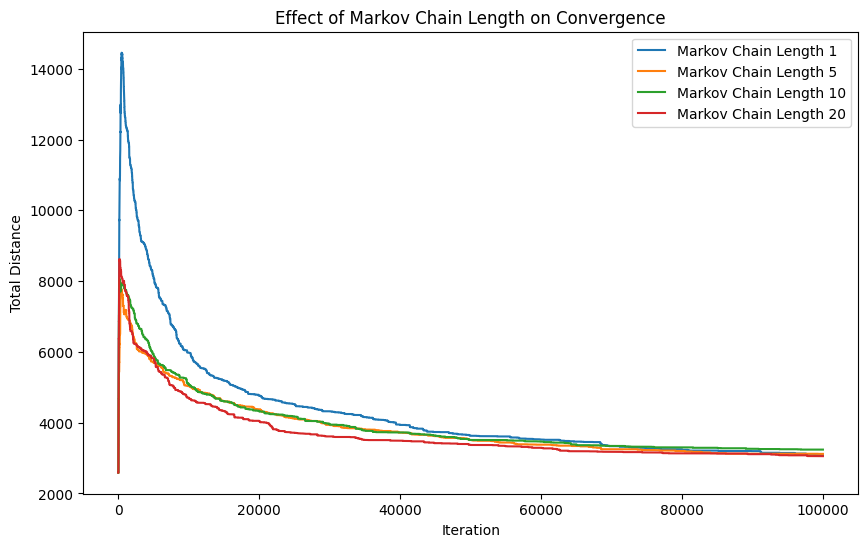

Convergence speed for each Markov Chain length: {1: 0, 5: 0, 10: 0, 20: 0}
Best Markov Chain length for fastest convergence: 1


{1: [2586.769647563161,
  2586.769647563161,
  2586.769647563161,
  2586.769647563161,
  2776.5341490829005,
  2776.5341490829005,
  2776.5341490829005,
  2882.551810505436,
  2882.551810505436,
  2882.551810505436,
  2882.551810505436,
  2882.551810505436,
  3133.3260997679663,
  3222.216725127424,
  3286.216725127424,
  3286.216725127424,
  3310.087633223764,
  3310.087633223764,
  3310.087633223764,
  3383.8482694693503,
  3383.8482694693503,
  3383.8482694693503,
  3383.8482694693503,
  3383.8482694693503,
  3565.9192283351995,
  3565.9192283351995,
  4056.8992159856994,
  4056.8992159856994,
  4056.8992159856994,
  4233.75849204922,
  4233.75849204922,
  4239.466016381078,
  4413.241645361236,
  4427.604441088554,
  4602.434208158579,
  4602.434208158579,
  4602.434208158579,
  4666.571544090756,
  4925.366827288421,
  4998.262424299255,
  4998.262424299255,
  4998.262424299255,
  5174.927937559933,
  5174.927937559933,
  5174.927937559933,
  5252.552885048393,
  5555.3933959021,


In [26]:
def markov_chain_effect(coordinates, initial_route, cooling_rate, number_of_iterations, markov_lengths):
    results = {}
    convergence_speed = {}

    for length in markov_lengths:
        _, _, distances = stochastic_annealing_2opt(
            coordinates, initial_route, cooling_rate, number_of_iterations
        )
        results[length] = distances

        # Determine convergence speed
        target_distance = np.min(distances) * 1.05  # Target set to 105% of the best found
        for i, dist in enumerate(distances):
            if dist <= target_distance:
                convergence_speed[length] = i
                break

    # Plotting the distances
    plt.figure(figsize=(10, 6))
    for length, distances in results.items():
        plt.plot(distances, label=f'Markov Chain Length {length}')

    plt.xlabel('Iteration')
    plt.ylabel('Total Distance')
    plt.title('Effect of Markov Chain Length on Convergence')
    plt.legend()
    plt.show()

    # Comparing convergence speed
    print("Convergence speed for each Markov Chain length:", convergence_speed)

    # Identifying the best length
    best_length = min(convergence_speed, key=convergence_speed.get)
    print("Best Markov Chain length for fastest convergence:", best_length)

    return results

# Example usage:
coordinates = read_tsp_file('a280.tsp.txt')
initial_route = read_tour_file('a280.opt.tour.txt')

# Experiment Parameters
cooling_rate = 0.995
number_of_iterations = 100000  # Total number of iterations
markov_lengths = [1, 5, 10, 20]  # Example Markov Chain lengths

# Conduct the experiment
markov_chain_effect(coordinates, initial_route, cooling_rate, number_of_iterations, markov_lengths)

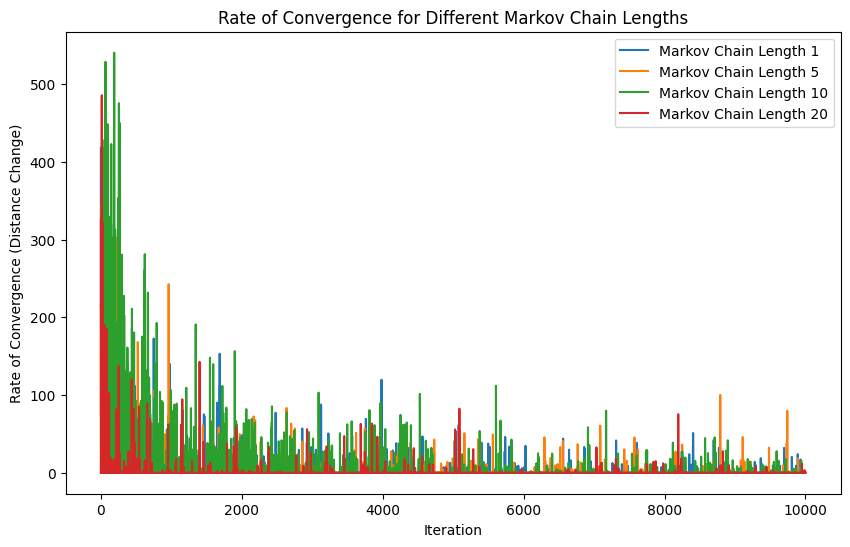

{1: [2586.769647563161,
  2797.5813494249264,
  3216.228518506876,
  3216.228518506876,
  3273.2133635118166,
  3273.2133635118166,
  3337.752738080139,
  3428.1262845699302,
  3697.848395835263,
  3697.848395835263,
  3697.848395835263,
  3846.3296862296643,
  3846.3296862296643,
  3846.3296862296643,
  4045.06973206862,
  4045.06973206862,
  4045.06973206862,
  4045.06973206862,
  4180.859059756702,
  4180.859059756702,
  4395.9779730050295,
  4395.9779730050295,
  4527.799689838393,
  4527.799689838393,
  4830.755458962252,
  4949.234433434156,
  4949.234433434156,
  5058.5057176872615,
  5058.5057176872615,
  5257.752277305636,
  5620.5914439496455,
  5713.356850124388,
  5713.356850124388,
  5839.946661374317,
  5839.946661374317,
  5839.946661374317,
  5839.946661374317,
  5839.946661374317,
  5839.946661374317,
  5839.946661374317,
  5839.946661374317,
  5839.946661374317,
  5937.568090232795,
  5937.568090232795,
  5937.568090232795,
  5937.568090232795,
  5937.568090232795,
  

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# ... [Include the definitions of all your existing functions here] ...

def markov_convergence_rates(coordinates, initial_route, cooling_rate, number_of_iterations, markov_lengths):
    results = {}
    convergence_rates = {}

    for length in markov_lengths:
        # Run the simulated annealing with the given Markov Chain length
        _, _, distances = stochastic_annealing_2opt(
            coordinates, initial_route, cooling_rate, number_of_iterations
        )
        results[length] = distances

        # Calculate the rate of convergence
        convergence_rates[length] = np.diff(distances)  # np.diff() calculates the change between each pair of adjacent elements

    # Plotting the rate of convergence
    plt.figure(figsize=(10, 6))
    for length, rates in convergence_rates.items():
        plt.plot(np.abs(rates), label=f'Markov Chain Length {length}')

    plt.xlabel('Iteration')
    plt.ylabel('Rate of Convergence (Distance Change)')
    plt.title('Rate of Convergence for Different Markov Chain Lengths')
    plt.legend()
    plt.show()

    return results

# Example usage:
coordinates = read_tsp_file('a280.tsp.txt')
initial_route = read_tour_file('a280.opt.tour.txt')

# Experiment Parameters
cooling_rate = 0.995
number_of_iterations = 10000  # Total number of iterations
markov_lengths = [1, 5, 10, 20]  # Example Markov Chain lengths

# Conduct the experiment
markov_convergence_rates(coordinates, initial_route, cooling_rate, number_of_iterations, markov_lengths)
